# 1. Load data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [34]:
df_20_21 = pd.read_csv('../data/input/diem_thi_thpt_2020_2021.csv')
df_22 = pd.read_csv('../data/input/diem_thi_thpt_2022.csv')
df_23 = pd.read_csv('../data/input/diem_thi_thpt_2023.csv')
df_24 = pd.read_csv('../data/input/diem_thi_thpt_2024.csv')

C:\Users\Hi\AppData\Local\Temp\ipykernel_29572\1553404793.py:1: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_20_21 = pd.read_csv('../data/input/diem_thi_thpt_2020_2021.csv')


# 2. Data cleaning

## 2.1. Data type, NULL value, Duplicate values

In [35]:
df_20_21.sort_values(by='SBD', ascending=True).head(2)

,SBD,Tên,Ngày Sinh,Giới tính,Toán,Văn,Lý,Hoá,Sinh,Lịch Sử,Địa Lý,GDCD,Ngoại Ngữ,Year,code,province
870577,1000001,NaN,NaN,NaN,2.2,3.5,NaN,NaN,NaN,2.5,5.5,NaN,NaN,2021,1,Hà Nội
173247,1000001,NaN,NaN,NaN,7.0,6.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,2020,1,Hà Nội


In [36]:
df_22.sort_values(by='sbd', ascending=True).head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25


In [37]:
df_23.sort_values(by='sbd', ascending=True).head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.5,9.2,NaN,NaN,NaN,6.75,6.0,9.0,N1
1,1000002,7.2,8.5,9.2,NaN,NaN,NaN,8.75,6.5,8.5,N1


In [38]:
df_24.sort_values(by='sbd', ascending=True).head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.0,8.0,N1


### Transform table

In [39]:
df_20_21['ma_ngoai_ngu'] = 'none'

df_20_21 = df_20_21[['SBD', 'Toán', 'Văn', 'Ngoại Ngữ', 'Lý', 'Hoá', 'Sinh', 'Lịch Sử', 'Địa Lý', 'GDCD', 'ma_ngoai_ngu', 'Year']]

df_20_21.columns = ['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd', 'ma_ngoai_ngu', 'year']

In [40]:
df_20_21.sort_values(by='sbd', ascending=True).head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year
870577,1000001,2.2,3.5,NaN,NaN,NaN,NaN,2.5,5.5,NaN,none,2021
173247,1000001,7.0,6.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,none,2020


In [41]:
df_22['ma_ngoai_ngu'] = 'none'
df_22['year'] = '2022'
df_23['year'] = '2023'
df_24['year'] = '2024'

In [42]:
df_24.head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1,2024
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.0,8.0,N1,2024


## Concat all tables

In [43]:
df_data_all = pd.concat([df_20_21, df_22, df_23, df_24], ignore_index=True)

In [44]:
df_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936983 entries, 0 to 4936982
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sbd           int64  
 1   toan          float64
 2   ngu_van       float64
 3   ngoai_ngu     float64
 4   vat_li        float64
 5   hoa_hoc       float64
 6   sinh_hoc      float64
 7   lich_su       float64
 8   dia_li        float64
 9   gdcd          float64
 10  ma_ngoai_ngu  object 
 11  year          object 
dtypes: float64(9), int64(1), object(2)
memory usage: 452.0+ MB


### Create table of province

In [45]:
df_code = pd.read_csv('../data/input/province_code.csv').astype(str)

In [46]:
df_code.sort_values(by='code', ascending=True).head(5)

,code,province
0,1,Hà Nội
9,10,Lạng Sơn
10,11,Bắc Kạn
11,12,Thái Nguyên
12,13,Yên Bái


In [47]:
def province_code(x):
    if len(str(x)) == 7:
        return str(x)[0]
    return str(x)[:2]

In [48]:
df_data_all['province_code'] = df_data_all['sbd'].apply(province_code)

In [49]:
df_data_all.head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year,province_code
0,18014547,6.4,6.75,4.2,NaN,NaN,NaN,4.75,7.00,6.50,none,2020,18
1,18014530,7.6,6.00,2.8,NaN,NaN,NaN,3.75,7.75,7.75,none,2020,18


# 3. Analyze

## 3.1. Overview

In [50]:
df_data_all['year'] = df_data_all['year'].astype(str)

In [51]:
df_data_all['year'].unique()

array(['2020', '2021', '2022', '2023', '2024'], dtype=object)

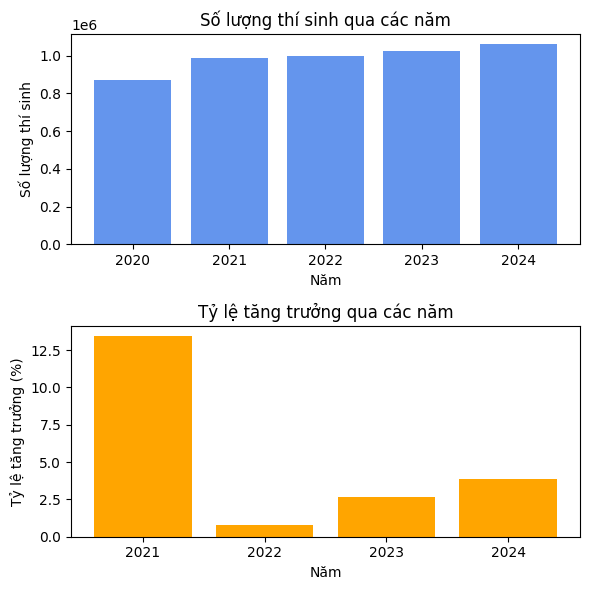

In [53]:
data = df_data_all

students_per_year = data['year'].value_counts().sort_index()

growth_rate = students_per_year.pct_change() * 100

students_growth_df = pd.DataFrame({
    'Số lượng thí sinh': students_per_year,
    'Tỷ lệ tăng trưởng (%)': growth_rate
}).reset_index().rename(columns={'index': 'year'})

fig, ax = plt.subplots(2, 1, figsize=(6, 6))

ax[0].bar(students_growth_df['year'], students_growth_df['Số lượng thí sinh'], color='cornflowerblue')
ax[0].set_xlabel('Năm')
ax[0].set_ylabel('Số lượng thí sinh')
ax[0].set_title('Số lượng thí sinh qua các năm')
ax[0].grid(False)

ax[1].bar(students_growth_df['year'], students_growth_df['Tỷ lệ tăng trưởng (%)'], color='orange')
ax[1].set_xlabel('Năm')
ax[1].set_ylabel('Tỷ lệ tăng trưởng (%)')
ax[1].set_title('Tỷ lệ tăng trưởng qua các năm')
ax[1].grid(False)


plt.tight_layout()
plt.show()

### Score distribution over years

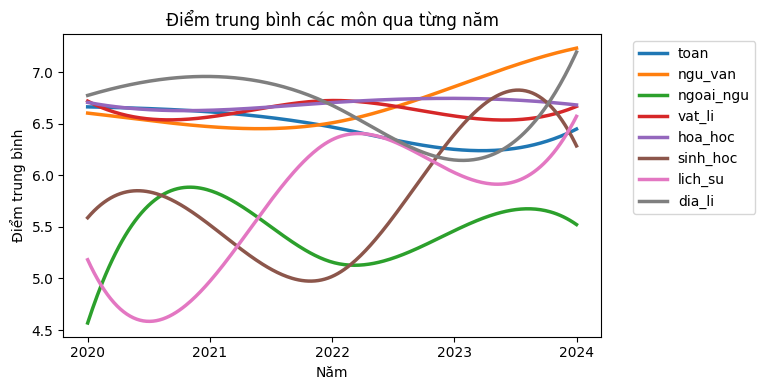

In [55]:
from scipy.interpolate import make_interp_spline

data = df_data_all

data['year'] = pd.to_numeric(data['year'])

x_year = [2020, 2021, 2022, 2023, 2024]

subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li']

mean_scores_by_year = data.groupby('year')[subjects].mean().reset_index()

plt.figure(figsize=(8, 4))

for subject in subjects:
    x = mean_scores_by_year['year']
    y = mean_scores_by_year[subject]

    x_new = np.linspace(x.min(), x.max(), 300)

    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_new)

    plt.plot(x_new, y_smooth, label=subject, linewidth=2.5, alpha=1)

plt.title('Điểm trung bình các môn qua từng năm')
plt.xlabel('Năm')
plt.ylabel('Điểm trung bình')
plt.xticks(x_year)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(False)
plt.tight_layout()
plt.show()

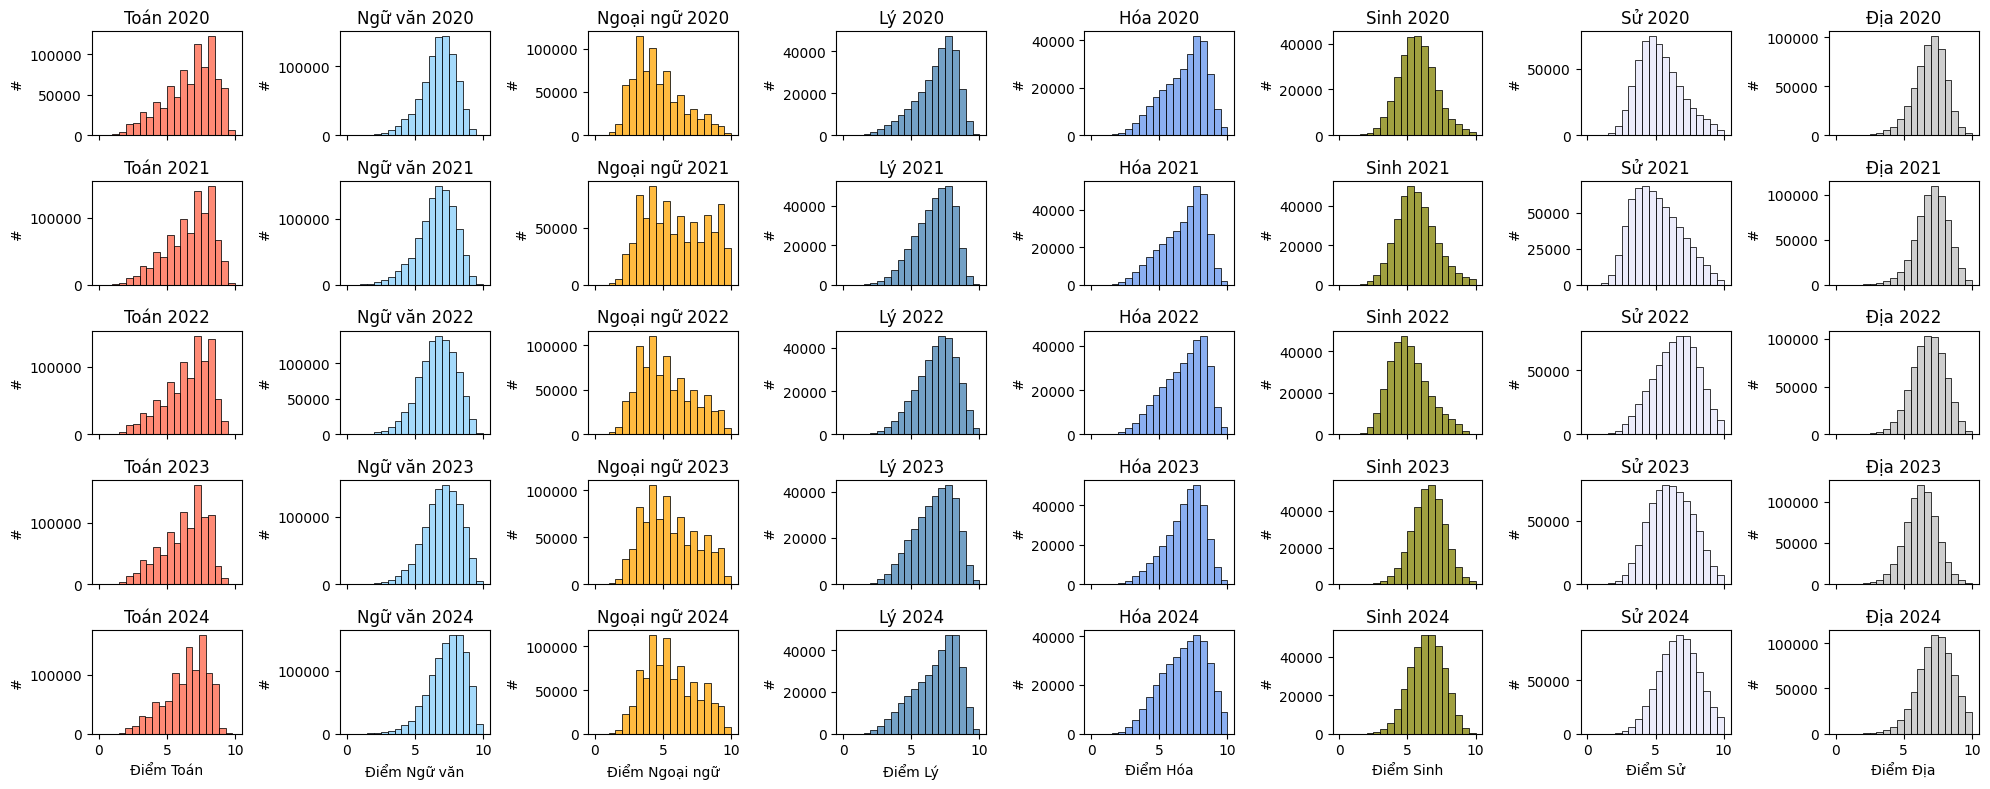

In [58]:
data = df_data_all

data['year'] = pd.to_numeric(data['year'])

recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

fig, axes = plt.subplots(5, 8, figsize=(20, 8), sharex=True)

subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li']
titles = ['Toán', 'Ngữ văn', 'Ngoại ngữ', 'Lý', 'Hóa', 'Sinh', 'Sử', 'Địa']
colors = ['tomato', 'lightskyblue', 'orange', 'steelblue', 'cornflowerblue', 'olive', 'lavender', 'silver']

recent_years_sorted = sorted(recent_years['year'].unique())

for i, year in enumerate(recent_years_sorted):
    for j, (subject, color) in enumerate(zip(subjects, colors)):
        sns.histplot(recent_years[recent_years['year'] == year][subject], bins=20, kde=False, ax=axes[i, j], edgecolor='black', color=color)
        axes[i, j].set_title(f'{titles[j]} {year}')
        axes[i, j].set_xlabel(f'Điểm {titles[j]}')
        axes[i, j].set_ylabel('#')

plt.tight_layout()
plt.show()

### Subject


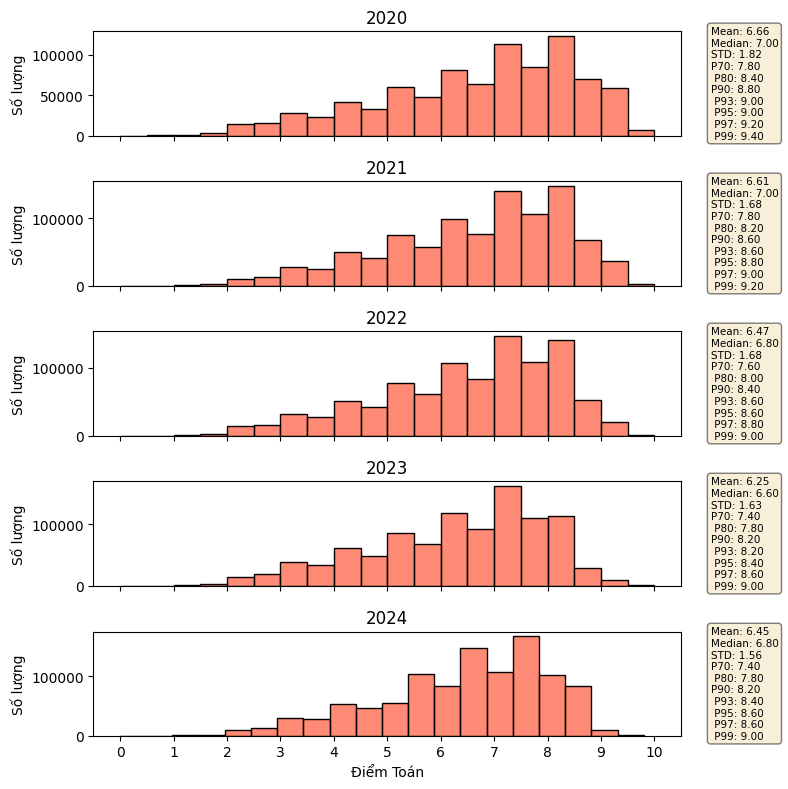

In [ ]:
data = df_data_all

data['year'] = pd.to_numeric(data['year'])

recent_years = data[data['year'].isin(data['year'].unique()[-5:])]

score = list(range(0, 11, 1))

fig, axes = plt.subplots(5, 1, figsize=(8, 8), sharex=True)

recent_years_sorted = sorted(recent_years['year'].unique())

for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['toan'], bins=20, kde=False, 
                 ax=axes[i], edgecolor='black', color='tomato')
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm Toán')
    axes[i].set_ylabel('Số lượng')

    year_data = recent_years[recent_years['year'] == year]['toan'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()

    # p25 = year_data.quantile(0.25)
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)
    
    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\n P80: {p80:.2f}\n'
               f'P90: {p90:.2f}\n P93: {p93:.2f}\n P95: {p95:.2f}\n P97: {p97:.2f}\n P99: {p99:.2f}')

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=7.5,
                 verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(score)
plt.tight_layout()
plt.show()

### Compare with previous years

In [63]:
sampled_data = df_data_all.sample(frac=0.3, random_state=1)

In [64]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1481095 entries, 2201011 to 3906872
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   sbd            1481095 non-null  int64  
 1   toan           1462610 non-null  float64
 2   ngu_van        1461251 non-null  float64
 3   ngoai_ngu      1291877 non-null  float64
 4   vat_li         492325 non-null   float64
 5   hoa_hoc        494642 non-null   float64
 6   sinh_hoc       487729 non-null   float64
 7   lich_su        974308 non-null   float64
 8   dia_li         966986 non-null   float64
 9   gdcd           814805 non-null   float64
 10  ma_ngoai_ngu   1394076 non-null  object 
 11  year           1481095 non-null  int64  
 12  province_code  1481095 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 158.2+ MB


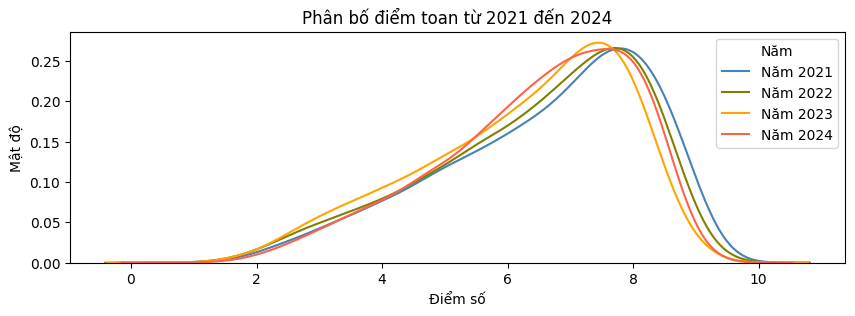

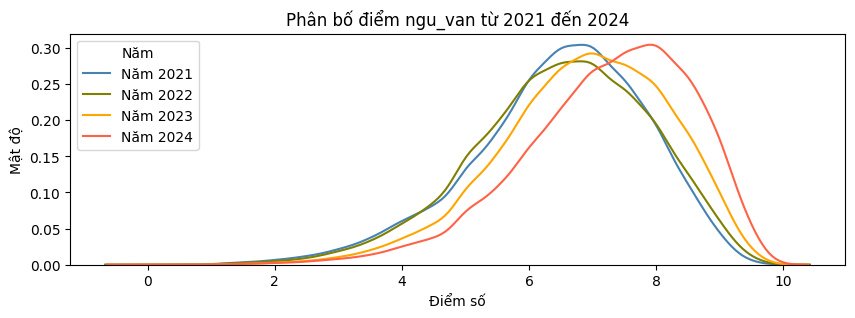

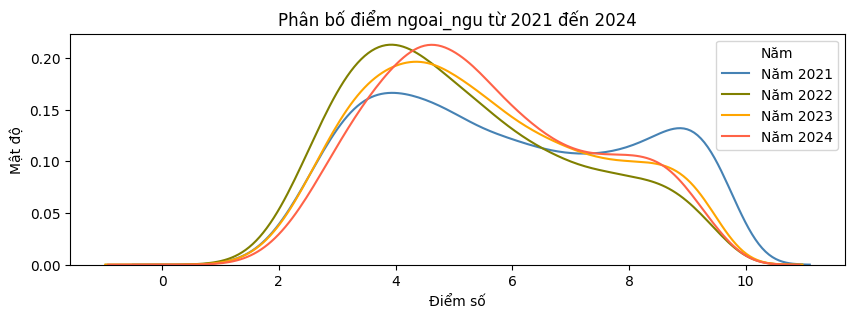

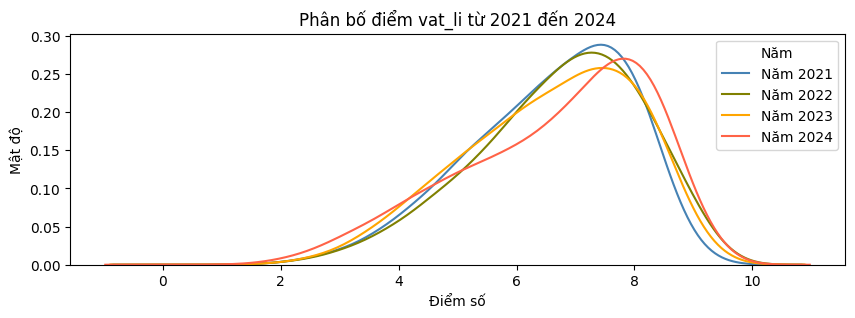

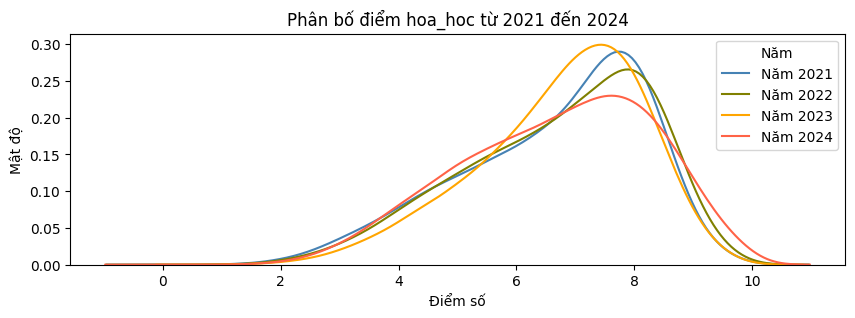

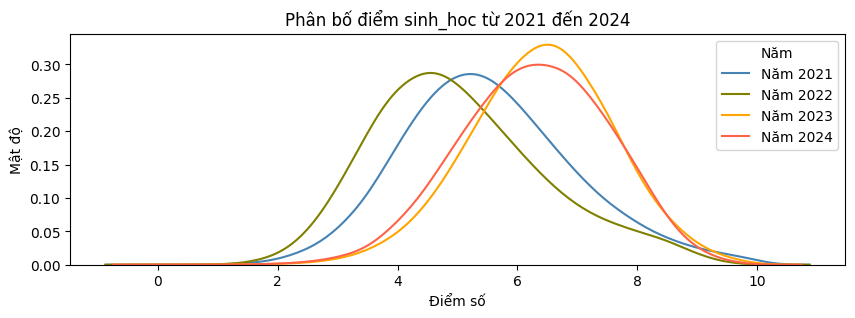

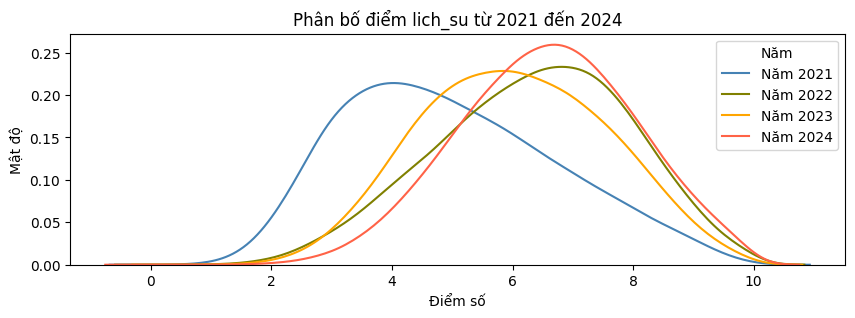

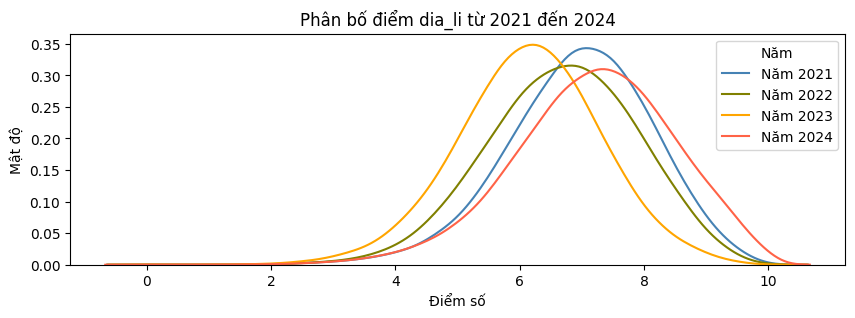

In [65]:
df_filtered = sampled_data[sampled_data['year'].isin([2021, 2022, 2023, 2024])]

subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li']
colors = ['steelblue', 'olive', 'orange', 'tomato']

for subject in subjects:
    plt.figure(figsize=(10, 3))
    for year, color in zip([2021, 2022, 2023, 2024], colors):
        data = df_filtered[df_filtered['year'] == year][subject].dropna()
        sns.kdeplot(data, label=f'Năm {year}', color=color, bw_adjust=2)
    
    plt.title(f'Phân bố điểm {subject} từ 2021 đến 2024')
    plt.xlabel('Điểm số')
    plt.ylabel('Mật độ')
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()

## 3.2. Group distribution

C:\Users\Hi\AppData\Local\Temp\ipykernel_29572\1462371050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['A']  = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['hoa_hoc']
C:\Users\Hi\AppData\Local\Temp\ipykernel_29572\1462371050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['A1'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['ngoai_ngu']
C:\Users\Hi\AppData\Local\Temp\ipykernel_29572\1462371050.py:3: SettingWithCopyWarning: 
A value is trying to be

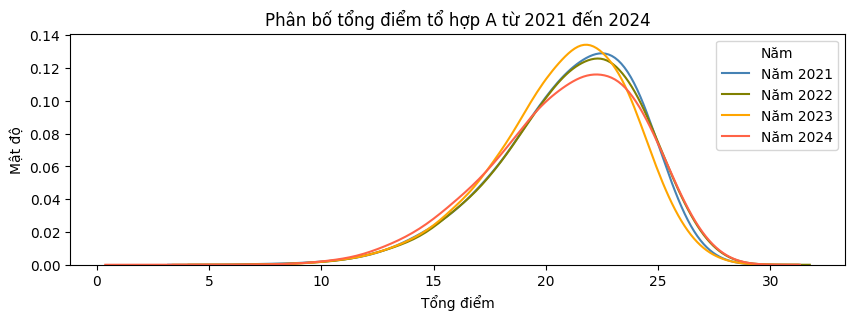

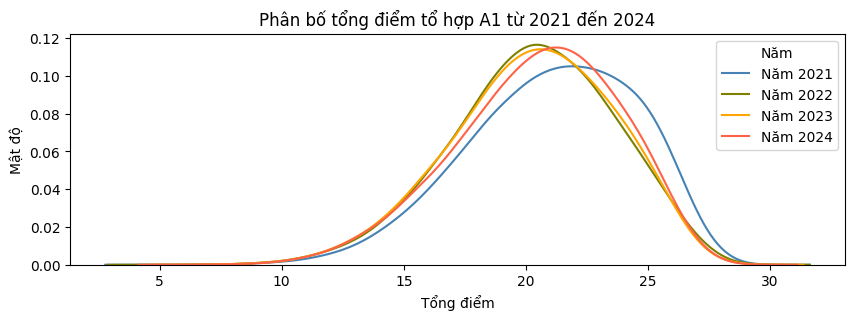

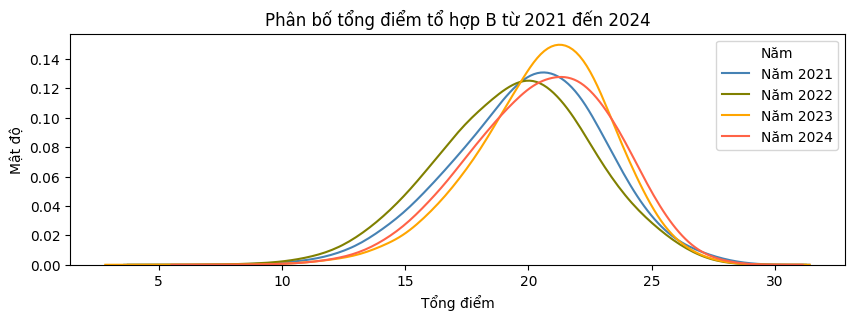

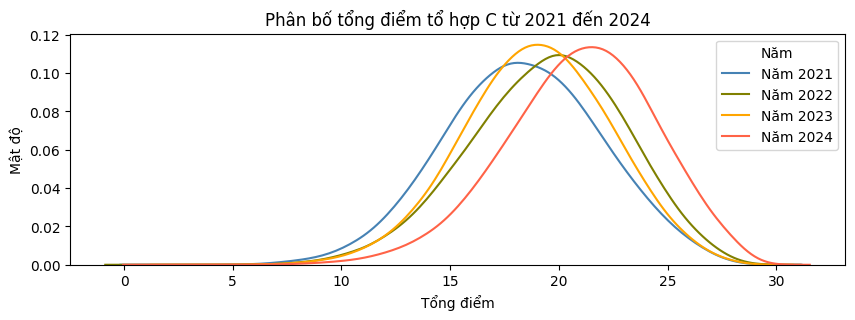

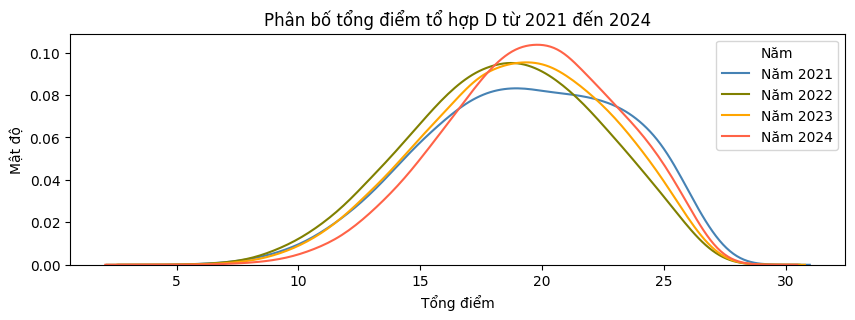

In [66]:
df_filtered['A']  = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['hoa_hoc']
df_filtered['A1'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['ngoai_ngu']
df_filtered['B']  = df_filtered['toan'] + df_filtered['hoa_hoc'] + df_filtered['sinh_hoc']
df_filtered['C']  = df_filtered['ngu_van'] + df_filtered['lich_su'] + df_filtered['dia_li']
df_filtered['D']  = df_filtered['toan'] + df_filtered['ngoai_ngu'] + df_filtered['ngu_van']

combinations = ['A', 'A1', 'B', 'C', 'D']

colors = ['steelblue', 'olive', 'orange', 'tomato']

for combo in combinations:
    plt.figure(figsize=(10, 3))
    for year, color in zip([2021, 2022, 2023, 2024], colors):
        data = df_filtered[df_filtered['year'] == year][combo].dropna()
        sns.kdeplot(data, label=f'Năm {year}', color=color, bw_adjust=2)

    plt.title(f'Phân bố tổng điểm tổ hợp {combo} từ 2021 đến 2024')
    plt.xlabel('Tổng điểm')
    plt.ylabel('Mật độ')
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()

### Group A

In [67]:
df_data_all['A']  = df_data_all['toan'] + df_data_all['vat_li'] + df_data_all['hoa_hoc']
df_data_all['A1'] = df_data_all['toan'] + df_data_all['vat_li'] + df_data_all['ngoai_ngu']
df_data_all['B']  = df_data_all['toan'] + df_data_all['hoa_hoc'] + df_data_all['sinh_hoc']
df_data_all['C']  = df_data_all['ngu_van'] + df_data_all['lich_su'] + df_data_all['dia_li']
df_data_all['D']  = df_data_all['toan'] + df_data_all['ngoai_ngu'] + df_data_all['ngu_van']

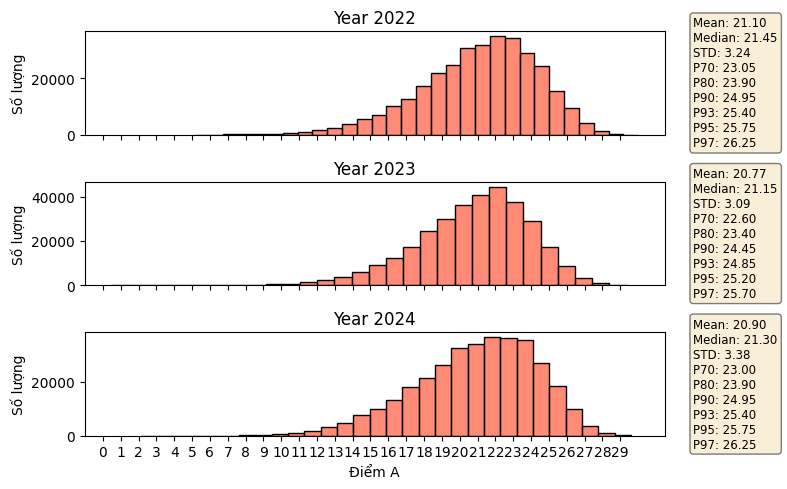

In [72]:
data = df_data_all

sub = 'A'

data['year'] = pd.to_numeric(data['year'])

recent_years = data[data['year'].isin([2022, 2023, 2024])]

socre = list(range(0, 30, 1))

fig, axes = plt.subplots(3, 1, figsize=(8, 5), sharex=True)

recent_years_sorted = sorted(recent_years['year'].unique())

for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year][sub], bins=30, kde=False, ax=axes[i], edgecolor='black', color='tomato')
    axes[i].set_title(f'Year {year}')
    axes[i].set_xlabel(f'Điểm {sub}')
    axes[i].set_ylabel('Số lượng')

    year_data = recent_years[recent_years['year'] == year][sub].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std_dev = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)

    textstr = (f'Mean: {mean:.2f}\nMedian: {median:.2f}\nSTD: {std_dev:.2f}\n'
            f'P70: {p70:.2f}\nP80: {p80:.2f}\n'
            f'P90: {p90:.2f}\nP93: {p93:.2f}\nP95: {p95:.2f}\nP97: {p97:.2f}')

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[i].text(1.05, 0.5, textstr, transform=axes[i].transAxes, fontsize=8.5,
                verticalalignment='center', horizontalalignment='left', bbox=props)

plt.xticks(socre)
plt.tight_layout()
plt.show()

C:\Users\Hi\AppData\Local\Temp\ipykernel_29572\3694314445.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['bins'] = pd.cut(df_2023[combo], bins)
C:\Users\Hi\AppData\Local\Temp\ipykernel_29572\3694314445.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['bins'] = pd.cut(df_2024[combo], bins)


Sự chênh lệch trung bình số học sinh: 768.4736842105267
Khoảng tin cậy 95% cho sự chênh lệch trung bình: (-4847.761081278546, 6384.708449699599)


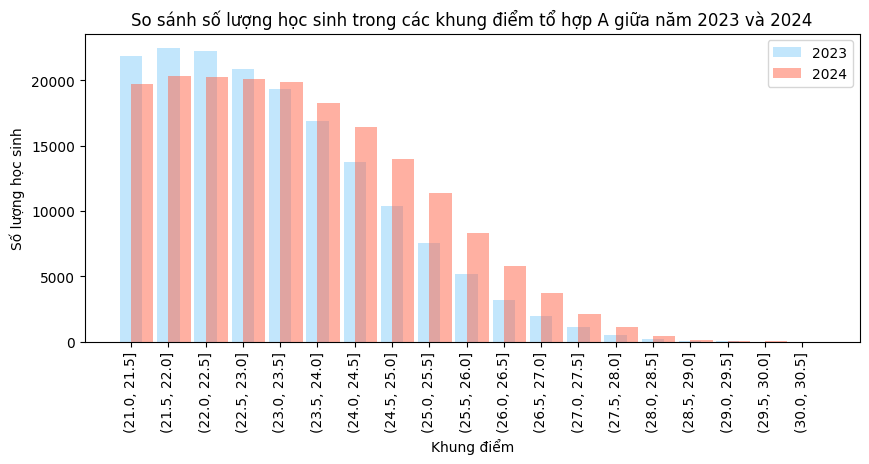

In [75]:
from scipy import stats

# Lựa chọn tổ hợp môn cần phân tích, ví dụ: A
combo = 'A'

# Chia khung điểm từ 20 đến 30, mỗi khoảng 1 điểm
bins = np.arange(21, 31, 0.5)

# Lọc dữ liệu cho các năm 2023 và 2024
df_2023 = df_data_all[df_data_all['year'] == 2023]
df_2024 = df_data_all[df_data_all['year'] == 2024]

# Tạo bảng đếm số lượng học sinh trong mỗi khung điểm cho từng năm
df_2023['bins'] = pd.cut(df_2023[combo], bins)
df_2024['bins'] = pd.cut(df_2024[combo], bins)

count_2023 = df_2023['bins'].value_counts().sort_index()
count_2024 = df_2024['bins'].value_counts().sort_index()

# Tính toán chênh lệch trung bình và khoảng tin cậy 95%
mean_diff = count_2024.mean() - count_2023.mean()
std_diff = np.sqrt(count_2024.var() + count_2023.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff / np.sqrt(len(count_2023)))

# Hiển thị kết quả
print("Sự chênh lệch trung bình số học sinh:", mean_diff)
print("Khoảng tin cậy 95% cho sự chênh lệch trung bình:", confidence_interval)

# Vẽ biểu đồ so sánh số lượng học sinh trong mỗi khung điểm cho hai năm
plt.figure(figsize=(10, 4))
plt.bar(count_2023.index.astype(str), count_2023.values, width=0.6, label='2023', align='center', alpha=0.5, color='lightskyblue')
plt.bar(count_2024.index.astype(str), count_2024.values, width=0.6, label='2024', align='edge', alpha=0.5,color='tomato')

plt.xlabel('Khung điểm')
plt.ylabel('Số lượng học sinh')
plt.title(f'So sánh số lượng học sinh trong các khung điểm tổ hợp {combo} giữa năm 2023 và 2024')

plt.xticks(rotation='vertical')
plt.legend()
plt.show()


In [79]:
combinations = ['A', 'A1', 'B', 'C', 'D']

percentiles = list(range(70, 101, 2))

percentile_df = pd.DataFrame(index=percentiles)

for combo in combinations:
    for year in [2022, 2023, 2024]:
        data = df_data_all[df_data_all['year'] == year][combo].dropna()
        percentile_values = np.percentile(data, percentiles)
        percentile_df[f'{combo}_{year}'] = percentile_values

percentile_df = percentile_df.T
percentile_df.index.name = 'Combination_Year'

In [80]:
percentile_df

,70,72,74,76,78,80,82,84,86,88,90,92,94,96,98,100
Combination_Year,,,,,,,,,,,,,,,,
A_2022,23.05,23.20,23.35,23.55,23.70,23.90,24.05,24.25,24.45,24.70,24.95,25.25,25.55,26.00,26.55,30.00
A_2023,22.60,22.75,22.90,23.05,23.25,23.40,23.60,23.75,23.95,24.20,24.45,24.70,25.05,25.45,26.10,29.35
A_2024,23.00,23.15,23.35,23.50,23.70,23.90,24.05,24.25,24.50,24.70,24.95,25.25,25.60,26.00,26.60,29.60
A1_2022,22.20,22.40,22.60,22.80,23.00,23.25,23.45,23.70,24.00,24.25,24.55,24.90,25.30,25.80,26.45,29.80
A1_2023,22.25,22.45,22.60,22.80,23.05,23.25,23.50,23.70,24.00,24.25,24.55,24.85,25.20,25.65,26.25,29.80
A1_2024,22.50,22.65,22.85,23.05,23.25,23.45,23.70,23.90,24.15,24.40,24.65,24.95,25.30,25.70,26.25,29.60
B_2022,21.15,21.30,21.50,21.65,21.85,22.05,22.30,22.55,22.80,23.05,23.40,23.75,24.20,24.80,25.60,29.35
B_2023,22.15,22.30,22.45,22.60,22.75,22.90,23.10,23.25,23.45,23.70,23.95,24.20,24.55,25.00,25.70,29.80
B_2024,22.30,22.45,22.60,22.80,22.95,23.15,23.35,23.55,23.75,24.00,24.25,24.55,24.85,25.35,26.00,29.55


### Correlation

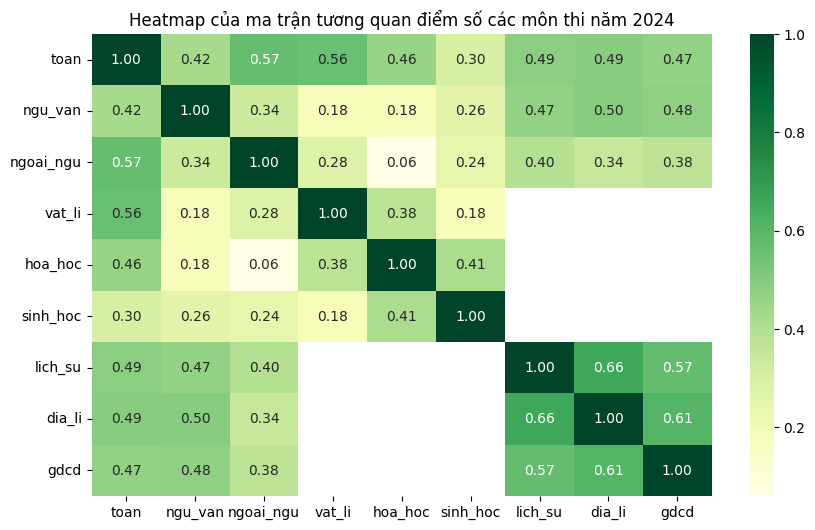

In [83]:
df_2024 = sampled_data[sampled_data['year'] == 2024]

subjects_scores = df_2024[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 
                           'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]

correlation_matrix = subjects_scores.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.title('Heatmap của ma trận tương quan điểm số các môn thi năm 2024')
plt.show()

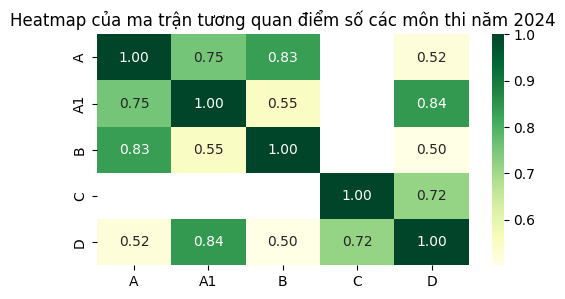

In [85]:
sampled_data['A'] = sampled_data['toan'] + sampled_data['vat_li'] + sampled_data['hoa_hoc']
sampled_data['A1'] = sampled_data['toan'] + sampled_data['vat_li'] + sampled_data['ngoai_ngu']
sampled_data['B'] = sampled_data['toan'] + sampled_data['hoa_hoc'] + sampled_data['sinh_hoc']
sampled_data['C'] = sampled_data['ngu_van'] + sampled_data['lich_su'] + sampled_data['dia_li']
sampled_data['D'] = sampled_data['toan'] + sampled_data['ngoai_ngu'] + sampled_data['ngu_van']

df_2024 = sampled_data[sampled_data['year'] == 2024]

group_scores = df_2024[['A', 'A1', 'B', 'C', 'D']]

correlation_matrix = group_scores.corr()

plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', fmt='.2f')
plt.title('Heatmap của ma trận tương quan điểm số các môn thi năm 2024')
plt.show()

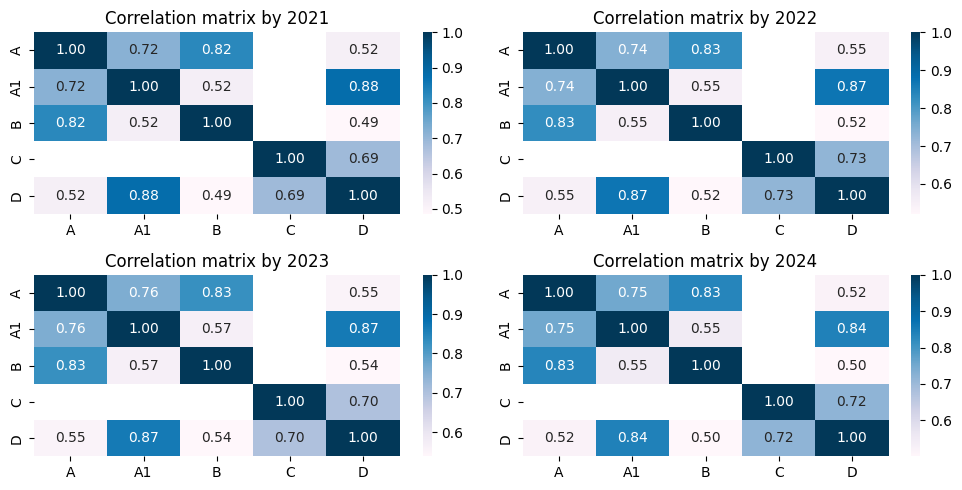

In [86]:
years = [2021, 2022, 2023, 2024]

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()

for i, year in enumerate(years):
    df_year = sampled_data[sampled_data['year'] == year]
    group_scores = df_year[['A', 'A1', 'B', 'C', 'D']]
    correlation_matrix = group_scores.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', fmt='.2f', ax=axes[i])
    axes[i].set_title(f'Correlation matrix by {year}')

plt.subplots_adjust(wspace=0.5, hspace=0.6)
plt.tight_layout()
plt.show()